### Propensity Score Matching w/ psmpy
(https://towardsdatascience.com/psmpy-propensity-score-matching-in-python-a3e0cd4d2631)

In [1]:
# Import packages
import pandas as pd
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [1]:
# Read in data
df = pd.read_csv('filtered_unmatched.csv')

NameError: name 'pd' is not defined

In [ ]:
# Columns to keep as covariates in PSM
psm_covariates = ['age', 'sex', 'tdep']

# Exclude everything else
exclusion_codes = [col for col in filtered_unmatched.columns if col not in psm_covariates + ['eid']]

In [5]:
psm = PsmPy(df, treatment='dx', indx = 'eid', exclude = exclusion_codes)

In [6]:
psm.logistic_ps(balance = True)

In [7]:
psm.predicted_data

,eid,age,sex,tdep,propensity_score,propensity_logit,dx
0,1000083,62,1,1.15,0.475457,-0.098251,1
1,1000347,61,1,-3.05,0.435335,-0.260116,1
2,1000537,63,0,-3.10,0.498653,-0.005387,1
3,1001880,64,1,-3.56,0.420048,-0.322578,1
4,1002446,56,0,-3.60,0.517425,0.069729,1
...,...,...,...,...,...,...,...
22381,6024374,62,1,-2.94,0.429618,-0.283410,0
22382,6024476,58,0,-2.69,0.519902,0.079651,0
22383,6024843,63,0,-4.11,0.485149,-0.059422,0
22384,6024935,58,1,-1.20,0.463001,-0.148267,0


In [8]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

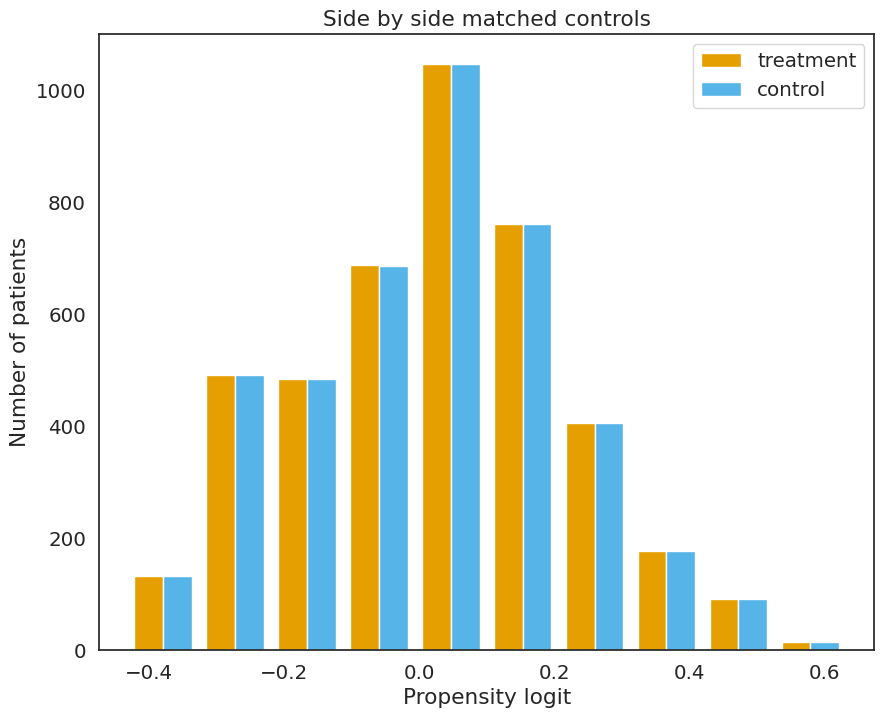

In [9]:
psm.plot_match(Title='Side by side matched controls', Ylabel='Number of patients', Xlabel= 'Propensity logit', names = ['treatment', 'control'], save=True)

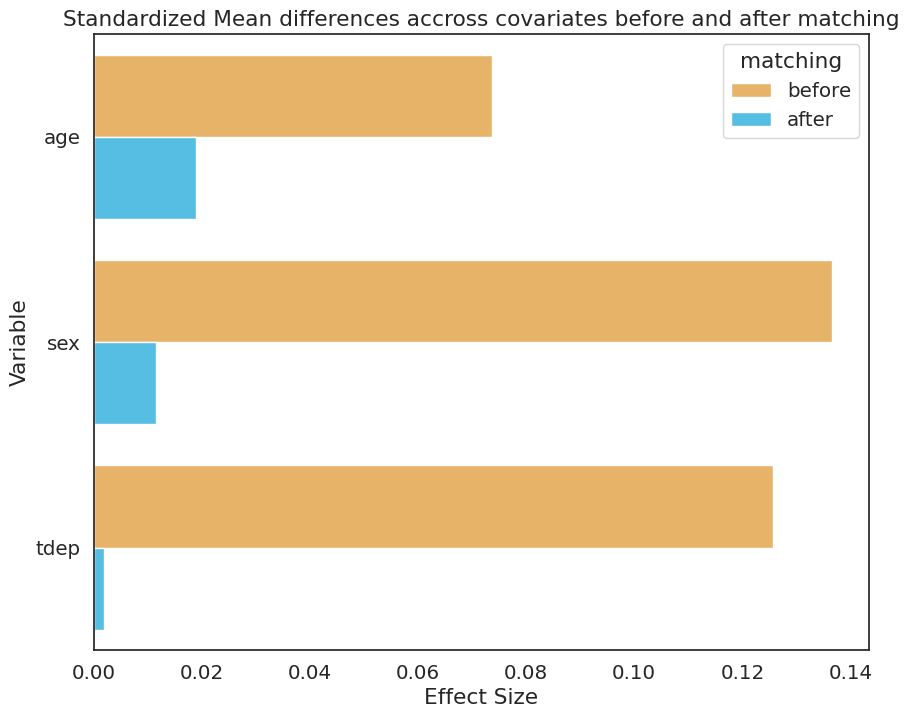

In [10]:
psm.effect_size_plot(save=True)

In [11]:
psm.matched_ids

,eid,matched_ID
0,1000083,4462885
1,1000347,1335029
2,1000537,2531652
3,1001880,4645387
4,1002446,5862885
...,...,...
4285,6020504,4407281
4286,6022064,3362855
4287,6022167,5201293
4288,6023060,2724746


In [12]:
psm.effect_size

,Variable,matching,Effect Size
0,age,before,0.073602
1,age,after,0.018892
2,sex,before,0.136575
3,sex,after,0.011473
4,tdep,before,0.125726
5,tdep,after,0.001908


In [15]:
# Stack and sort IDs
ids = psm.matched_ids.stack().reset_index()
ids = ids.drop(['level_0','level_1'], axis=1)
ids = ids.rename(columns={0:'eid'})
ids = ids.sort_values(by='eid').reset_index(drop=True)

In [16]:
# Subset based on matching data
data = pd.merge(df, ids, on='eid', how='right')
data

,eid,age,sex,tdep,dx,freq_social_visits,freq_unenthusiasm_disinterest,pal,dx_szspectrum,dx_dep,...,dx_ed,dx_sleep,dx_sexual_dys,dx_puerperium,dx_abuse_non_dep,dx_sud,dx_hab_imp,dx_adhd,dx_pd,dx_asd
0,1000083,62,1,1.15,1,5,1,4,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1000333,64,0,-2.70,0,4,1,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000347,61,1,-3.05,1,5,1,10,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1000537,63,0,-3.10,1,4,2,10,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1001598,51,0,3.36,0,4,2,10,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,6023060,52,0,1.39,1,5,4,10,0,0,...,0,0,0,0,0,0,0,0,0,0
8576,6023315,57,0,-3.33,0,3,1,10,0,0,...,0,0,0,0,0,0,0,0,0,0
8577,6024303,64,1,-1.88,1,4,3,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8578,6024843,63,0,-4.11,0,4,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Save csv
data.to_csv('ukbb_full_matched.csv', index=False)